In [4]:
#initialize python and import pandas/numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
plt.style.use('seaborn')
%matplotlib inline
import os

In [5]:
data = pd.read_excel("data/Master file Jan23.xls")

In [6]:
#drop unwanted columns
data.drop(columns=['MHV_Nom_orig','MGR_Nom_orig','AGR_Nom_orig','Average_orig',
          'MHV_Nom_dest','MGR_Nom_dest','AGR_Nom_dest','Average_dest',
          'Dem_Share_President_Two_orig', 'Rep_Share_President_Two_orig',
           'Dem_Share_President_Two_dest', 'Rep_Share_President_Two_dest',
           'Health_White_orig','Health_Black_orig','Health_Hispanic_orig','Health_Asian_orig','Health_Alaska_orig','Other_orig',
           'Health_White_dest','Health_Black_dest','Health_Hispanic_dest','Health_Asian_dest','Health_Alaska_dest','Other_dest'
          ])

,Year,StateCODE_orig,StateCODE_dest,Mig_Estimate,outmigshare,outmigsharepercent,inmigshare,inmigsharepercent,Distance,StateABRV_orig,...,PDSI_Rank_dest,PDSI_Anomaly_dest,Reg_Pri_Par_dest,Econ_Free_Sum_dest,Homeown_Perc_dest,Median_HHI_dest,Median_HHI_adj_dest,Coll_Educ_dest,hdd_dest,cdd_dest
0,2000,1,2,608.0,0.000137,0.013656,0.000968,0.096821,3459,AL,...,NaN,NaN,NaN,3.65,66.4,52847,77275,NaN,10392,4
1,2000,1,3,574.0,0.000129,0.012893,0.000111,0.011123,1485,AL,...,15.0,-2.99,NaN,6.67,68.0,39783,58172,NaN,1973,3155
2,2000,1,4,3168.0,0.000712,0.071156,0.001183,0.118271,347,AL,...,9.0,-2.96,NaN,6.40,68.9,29697,43424,NaN,3532,1901
3,2000,1,5,3025.0,0.000679,0.067944,0.000089,0.008900,1883,AL,...,72.0,0.00,NaN,5.30,57.1,46816,68456,NaN,2830,831
4,2000,1,6,321.0,0.000072,0.007210,0.000074,0.007419,1143,AL,...,34.0,-2.00,NaN,7.65,68.3,48240,70538,NaN,6874,419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41645,2016,50,45,0.0,0.000000,0.000000,0.000000,0.000000,1699,WY,...,72.0,0.43,99.491,5.15,71.3,60837,63660,36.4,7452,381
41646,2016,50,46,48.0,0.000082,0.008216,0.000006,0.000571,1528,WY,...,113.0,2.19,103.022,7.31,66.3,66451,69535,38.1,3958,1548
41647,2016,50,47,866.0,0.001482,0.148233,0.000119,0.011872,734,WY,...,108.0,2.02,104.816,6.18,61.6,70310,73573,35.1,4847,347
41648,2016,50,48,0.0,0.000000,0.000000,0.000000,0.000000,1388,WY,...,45.0,-0.87,90.482,4.42,74.8,44354,46412,20.8,4716,1148


In [7]:
#murphy's code around aggregating

def clean(data):
    temp_df = data
    # aggregate % adults in original state
    temp_df["Adults_orig"] = temp_df.loc[:, ["Adults_1925_orig", "Adults_2634_orig", "Adults_3554_orig",
                                            "Adults_5564_orig", "Adults_65_orig"]].sum(axis=1)
    temp_df = temp_df.drop(columns = ["Adults_1925_orig", "Adults_2634_orig", "Adults_3554_orig",
                                            "Adults_5564_orig", "Adults_65_orig"])
    # aggregate % adults in destination state
    temp_df["Adults_dest"] = temp_df.loc[:, ["Adults_1925_dest", "Adults_2634_dest", "Adults_3554_dest",
                                            "Adults_5564_dest", "Adults_65_dest"]].sum(axis=1)
    temp_df = temp_df.drop(columns = ["Adults_1925_dest", "Adults_2634_dest", "Adults_3554_dest",
                                            "Adults_5564_dest", "Adults_65_dest"])

    # drop unneccesary columns
    temp_df = temp_df.drop(columns = ["Homic_death_orig","Homic_death_dest","Unemp_tot_orig","Unemp_tot_dest",
                    "StateNAME_orig","StateNAME_dest","outmigsharepercent", "inmigsharepercent",
                    "PDSI_Rank_orig","PDSI_Rank_dest","PDSI_Anomaly_orig", "PDSI_Anomaly_dest",
                    "Urban_rural_orig","Urban_rural_dest", 'MHV_Nom_orig','MGR_Nom_orig','AGR_Nom_orig',
                    'Average_orig', 'MHV_Nom_dest','MGR_Nom_dest','AGR_Nom_dest','Average_dest',
                    'Dem_Share_President_Two_orig', 'Rep_Share_President_Two_orig',
                    'Dem_Share_President_Two_dest', 'Rep_Share_President_Two_dest',
                    'Health_White_orig','Health_Black_orig','Health_Hispanic_orig','Health_Asian_orig',
                    'Health_Alaska_orig','Other_orig', 'Health_White_dest','Health_Black_dest',
                    'Health_Hispanic_dest','Health_Asian_dest','Health_Alaska_dest','Other_dest'])
    
    # rename poorly named columns
    temp_df = temp_df.rename(columns = {"Children_018_orig": "Children_orig", "Children_018_dest": "Children_dest",
                                       "Econ_Free_Sum_dest": "Econ_Freedom_Score_dest",
                                        "Econ_Free_Sum_orig": "Econ_Freedom_Score_orig",
                                       "Reg_Pri_Par_orig": "Price_Parity_orig", "Reg_Pri_Par_orig": "Price_Parity_dest",
                                       "cdd_orig": "cool_deg_day_orig", "cdd_dest": "cool_deg_day_dest",
                                       "hdd_orig": "heat_deg_day_orig", "hdd_dest": "heat_deg_day_dest"})
    
    # deal with nulls as we go?
    temp_df["Children_orig"] = temp_df["Children_orig"].fillna(0)
    temp_df["Children_dest"] = temp_df["Children_dest"].fillna(0)

    
    return temp_df



In [8]:
#murphy's code to aggregate
cleaned_data = clean(data)

In [9]:
graph_data=cleaned_data.copy() #make a copy in case ur experimenting screws things up

In [10]:
#function to create time-series for a list of dif states and columns
def plot_time_series_data(column_list, state_list, data):
    for column in column_list:
        for state in state_list:
            # Create a sub-dataframe for the current state
            state_data = data[data['StateABRV_orig'] == state]
            
            # Create bar plot for econ var and state
            fig, ax = plt.subplots()
            ax.bar(state_data['Year'], state_data[column])
            ax.set_xlabel('Year')
            ax.set_ylabel(column)
            ax.set_title(f'{column} in {state}')
            
            # Show the plot
            plt.show()

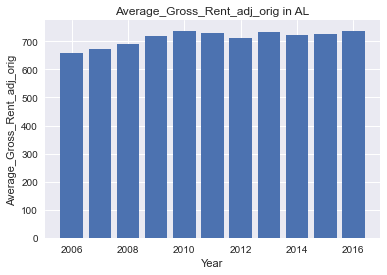

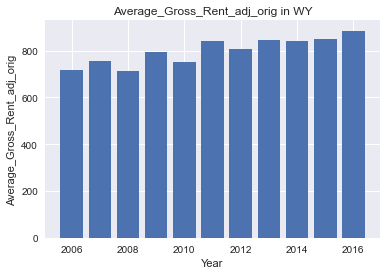

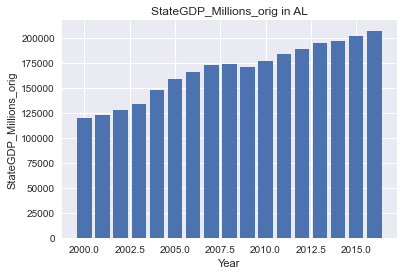

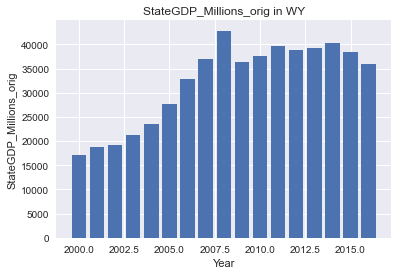

In [11]:
column_list=['Average_Gross_Rent_adj_orig', 'StateGDP_Millions_orig']
state_list=['AL', 'WY']
plot_time_series_data(column_list, state_list, graph_data)

In [23]:
#function that takes those time series plots and creates a polynomial to fit the plot
#then returns the estimated values of the variable for the years we listed
def fit_to_polynomial(data, years, column, state, degree=2):
    #create state data frame
    state_df = data[data['StateABRV_orig']==state]
    
    #drop na values
    no_nulls_df = state_df.dropna(subset=[column, 'Year'])
    no_nulls_df = no_nulls_df[pd.notnull(no_nulls_df[column])]
    
    #designate x and y
    x = np.array(no_nulls_df['Year'])
    y = np.array(no_nulls_df[column])
    
    print(x)
    
    #fit polynomial models up to degree 5
    coeffs = np.polyfit(x, y, degree)
    model = np.poly1d(coeffs)
    
#     # plot the scatterplot
#     plt.scatter(x, y)

#     # plot the fitted polynomial line
#     plt.plot(x, model(x), color='green')
    
#     plt.show()
    
    # predict the values for the given years
    predicted_values = model(years)
    
    return predicted_values

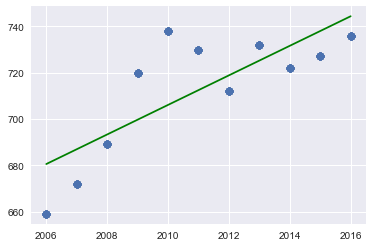

estimated values for 2013 and 2014: [725.21818182 731.6       ]


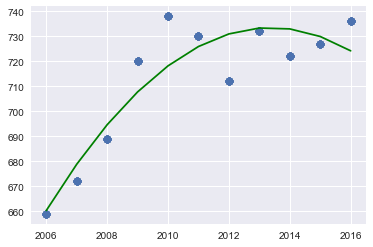

estimated values for 2013 and 2014: [733.28811189 732.94498835]


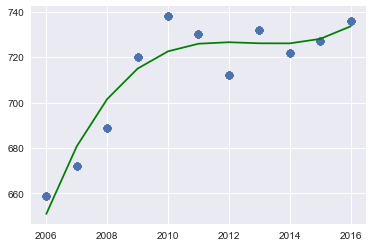

estimated values for 2013 and 2014: [726.0932374  726.06293344]


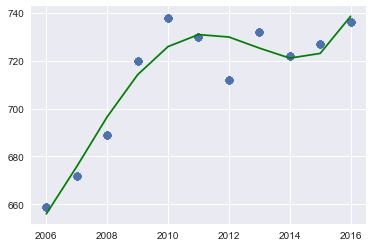

estimated values for 2013 and 2014: [725.26123047 721.07006836]


In [13]:
#testing the polynomial fit (can delete later. just for shits and gigs)
estimated_values = fit_to_polynomial(graph_data,[2013,2014], 'Average_Gross_Rent_adj_orig', 'AL', 1)
print('estimated values for 2013 and 2014:', estimated_values)
estimated_values = fit_to_polynomial(graph_data,[2013,2014], 'Average_Gross_Rent_adj_orig', 'AL', 2)
print('estimated values for 2013 and 2014:', estimated_values)
estimated_values = fit_to_polynomial(graph_data,[2013,2014], 'Average_Gross_Rent_adj_orig', 'AL', 3)
print('estimated values for 2013 and 2014:', estimated_values)
estimated_values = fit_to_polynomial(graph_data,[2013,2014], 'Average_Gross_Rent_adj_orig', 'AL', 4)
print('estimated values for 2013 and 2014:', estimated_values)

In [24]:
#make a list of all the columns we want to get estimates for:
null_columns = graph_data[graph_data.columns[graph_data.isna().any()]]
null_columns_list =sorted(null_columns.columns.values.tolist())

#edit list to have only orig values
imputation_columns=['Average_Gross_Rent_adj_orig','Coll_Educ_orig', 'Health_Adults_orig','Homicide_Rate_orig','Inc_Corp_Tax_orig',
                   'Median_Gross_Rent_adj_orig','Median_House_Value_adj_orig', 'PDSI_Value_orig']


In [25]:
#code to run estimations for alll of the variables

years=[2013,2014]
for col in imputation_columns:
    estimated_values = fit_to_polynomial(data, [2013, 2014], col, 'AL', 3)
    print('column: ', col)
    print('estimated values: ', estimated_values)

[2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006
 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006
 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006
 2006 2006 2006 2006 2006 2006 2006 2007 2007 2007 2007 2007 2007 2007
 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007
 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007
 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 2007
 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008
 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008
 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 2008
 2008 2008 2008 2008 2008 2008 2008 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 2009
 2010 

In [ ]:
STILL TO DO:
    - edit imputations so that it picks the best degree based on the set of points
    - change from a list of columns with missing values to a dictionary
        - use this dictionary to store both the column names AND the years we need to impute
    - get these imputed values into the dataframe (well into a copy of the data frame)
    -cry tears of joy if u get it to work


